# Effects of Trip Data Characteristics on Their Duration

## Investigation Overview

In this investigation, I wanted to look at the characteristics of trip data that could be used to predict their duration. The main focus was on the five: age, start station, end station, user type, and gender.

## Dataset Overview

The data consisted of duration_sec and attributes of approximately 183,412. The attributes included the five, as well as additional measurements such as start station name, start station latitude, and start station longitude. 

In [7]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [8]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('C:/Users/bijad/Desktop/norahpro7 NEW/201902-fordgobike-tripdata.csv/201902-fordgobike-tripdata.csv')

In [9]:
# change the data type for start and end time to be datetime64[ns] 
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)

In [10]:
# change the data type for bike_share_for_all_trip to be bool
df.bike_share_for_all_trip = (df.bike_share_for_all_trip == 'Yes')

## Distribution of Trip Durations

Trip Durations in the dataset take on a very large range of values. Number of Trips values first increases starting from around 8000 values to 12500 values at peak around 600 seconds but then starts to fall below at 2000 values.

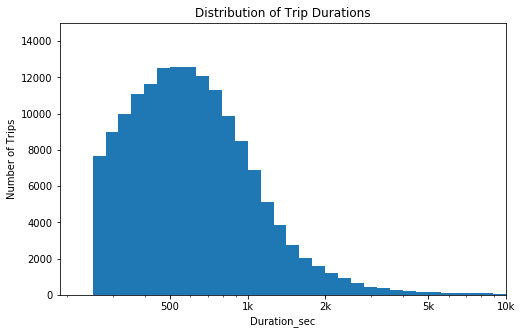

In [11]:
log_binsize = 0.05
bins_log = 10 ** np.arange(2.4, np.log10(df['duration_sec'].max()) + log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_sec', bins = bins_log)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration_sec')
plt.ylabel('Number of Trips')
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4], [500, '1k', '2k', '5k', '10k'])
plt.axis([0, 10000, 0, 15000])
plt.show()

## Distribution of User Age

In the case of age, you can see that the distribution is more concentrated between 20 to 40 years old.

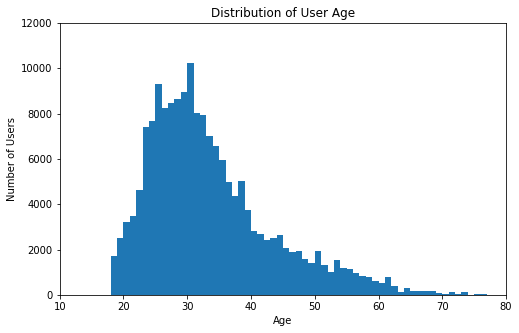

In [12]:
# Plotting age distribution derived from member's birth year.
binsize = 1
bins = np.arange(0, df['member_birth_year'].astype(float).max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df.dropna(), x = 'member_birth_year', bins = bins)
plt.axis([1939, 2009, 0, 12000])
plt.xticks([1939, 1949, 1959, 1969, 1979, 1989, 1999, 2009], [(2019-1939), (2019-1949), (2019-1959), (2019-1969), (2019-1979), (2019-1989), (2019-1999), (2019-2009)])
plt.gca().invert_xaxis()
plt.title('Distribution of User Age')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.show()

## Trip Duration vs. Age

By looking at the chart below, we can see that most frequent users aged between 20 and 45. As remark, duration is registered by younger members.

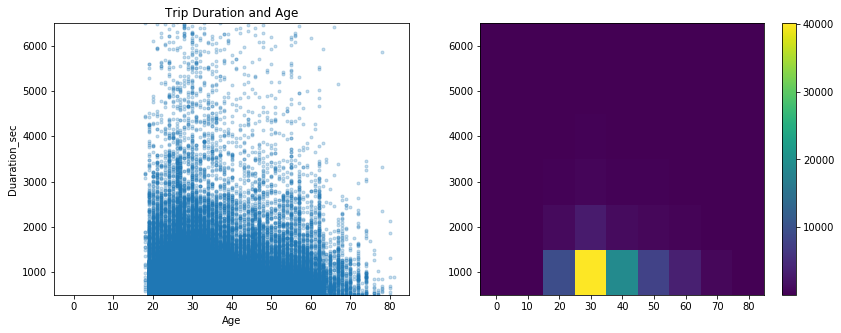

In [13]:
# As you can see, the most of the durations are below 6000 and age is below 80, I need to crop the plot to those values.

plt.figure(figsize=[14,5])

plt.subplot(1, 2, 1)
plt.scatter((2019 - df['member_birth_year']), df['duration_sec'], alpha = 0.25, marker = '.' )
plt.axis([-5, 85, 500, 6500])
plt.title('Trip Duration and Age')
plt.xlabel('Age')
plt.ylabel('Duaration_sec')

plt.subplot(1, 2, 2)
bins_y = np.arange(500, 6500+1, 1000)
bins_x = np.arange(-5, 85+1, 10)
plt.hist2d((2019 - df['member_birth_year']), df['duration_sec'],
           bins = [bins_x, bins_y])
plt.colorbar(ticks=[10000, 20000, 30000, 40000]);
plt.show()

## Trip Duration and Age by Gender

The main thing I want to explore in this part of the analysis is how the three categorical measures of gender into the relationship between trip duration and age.

For the age, duration, and gender, for the others leap at an older age (around 60 years) to got 3000 trip duration.

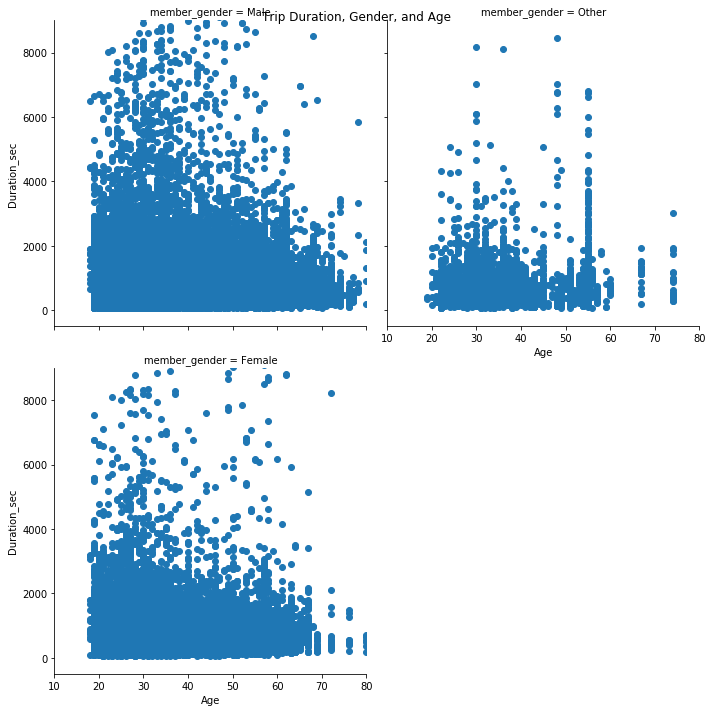

In [14]:
df['age'] = (2019 - df['member_birth_year'])
gender = sb.FacetGrid(data = df, col = 'member_gender', col_wrap = 2, size = 5,
                 xlim = [10, 80], ylim = [-500, 9000])
gender.map(plt.scatter, 'age', 'duration_sec', alpha= 1)

gender.set_xlabels('Age')
gender.set_ylabels('Duration_sec')
gender.fig.suptitle('Trip Duration, Gender, and Age')

plt.show()

## Trip Duration and Age by User Type

The main thing I want to explore in this part of the analysis is how the three categorical measures of user type into the relationship between trip duration and age.

For the age, duration, and user type, both Customer and Subscriber are showing similar trends for age and trip duration, but for subscribers the trip duration is higher for older age.

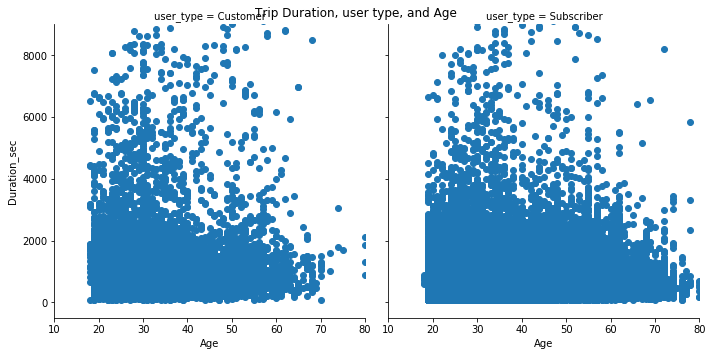

In [15]:
user_type = sb.FacetGrid(data = df, col = 'user_type', col_wrap = 2, size = 5,
                 xlim = [10, 80], ylim = [-500, 9000])
user_type.map(plt.scatter, 'age', 'duration_sec', alpha= 1)

user_type.set_xlabels('Age')
user_type.set_ylabels('Duration_sec')
user_type.fig.suptitle('Trip Duration, user type, and Age')
plt.show()

In [16]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [ ]:
!jupyter nbconvert SlideDeck_Ford_GoBike.ipynb --to slides --post serve --template output_toggle